In [1]:
import os
import seaborn as sns
import matplotlib.pylab as plt
from pyspark.sql.window import Window
from pyspark.sql import SparkSession
from pyspark.context import SparkContext
from pyspark.conf import SparkConf
import pyspark.sql.functions as f 

In [2]:
#load_dotenv()
DIR_LOCAL = os.path.dirname(os.path.realpath('__file__'))
DIR_PATH = os.path.join(DIR_LOCAL, 'data')

In [3]:
config = SparkConf().setAll([('spark.executor.memory', '40g'), ('spark.executor.cores', '16'), ('spark.cores.max', '16'), ('spark.driver.memory', '30g')])
sc = SparkContext(conf=config)
spark = SparkSession(sc)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/01/11 20:14:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/01/11 20:14:03 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [6]:
dataset = spark.read.parquet(os.path.join('/home/andre/Dropbox/projects/fundamentalista_model/data', 'dataset_model.parquet'))

In [7]:
dataset = (
    dataset
    .withColumn('dt_month', f.month(f.col('date')))
    .select('date', 'dt_year', 'dt_quarter', 'dt_month', 'target')
)

In [8]:
tot = dataset.groupBy('dt_year', 'dt_month').agg(f.count('target').alias('total'))
df = (
    dataset
    .groupBy('dt_year', 'dt_month', 'target')
    .agg(f.count(f.col('target')).alias('qty'))
    .join(tot, on=['dt_year', 'dt_month'], how='left')
    .withColumn('pct', f.round((f.col('qty')/f.col('total'))*100, 2))
).toPandas()


In [9]:
df.head()

,dt_year,dt_month,target,qty,total,pct
0,2022,10,0,3481,9373,37.14
1,2022,10,1,5892,9373,62.86
2,2012,10,0,2445,6731,36.32
3,2012,10,1,4286,6731,63.68
4,2015,2,1,4427,6822,64.89


In [10]:
tb = dataset.toPandas()

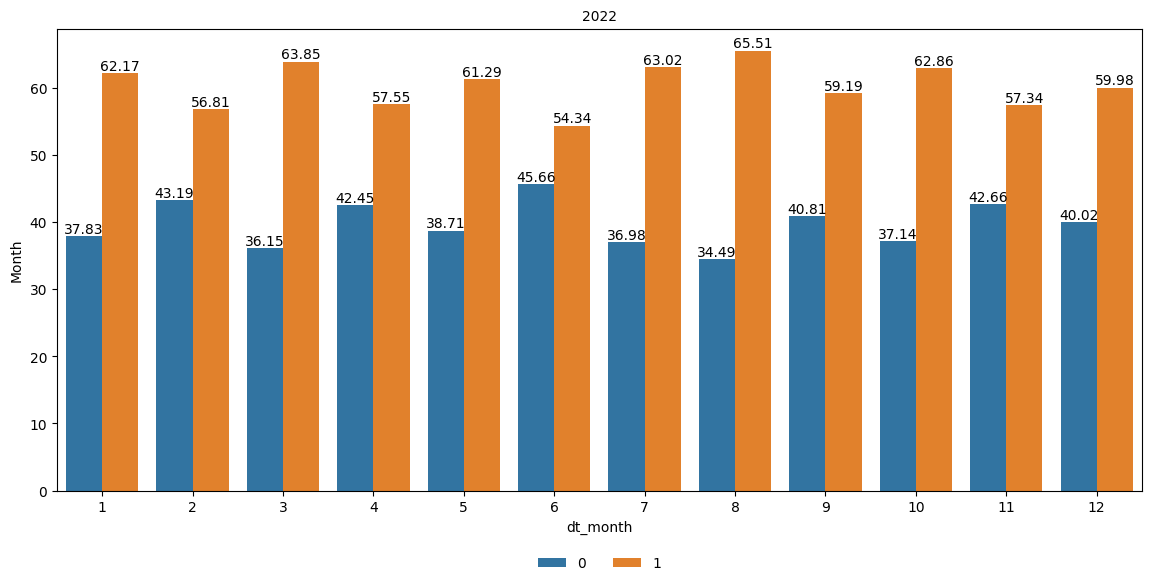

In [11]:
year = 2022
fig = plt.figure(figsize=(14,6))
tb = df[df['dt_year']==year]
ax = sns.barplot(x = 'dt_month', y = 'pct', hue='target', data = tb)
for i in ax.containers:
    ax.bar_label(i,)
    
#ax.tick_params(axis='x', labelrotation=30)
ax.set_title(f'{year}', fontsize=10)
ax.set_ylabel('Month', fontsize=10)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, -.2),
    ncol=2,
    title=None, frameon=False,
)

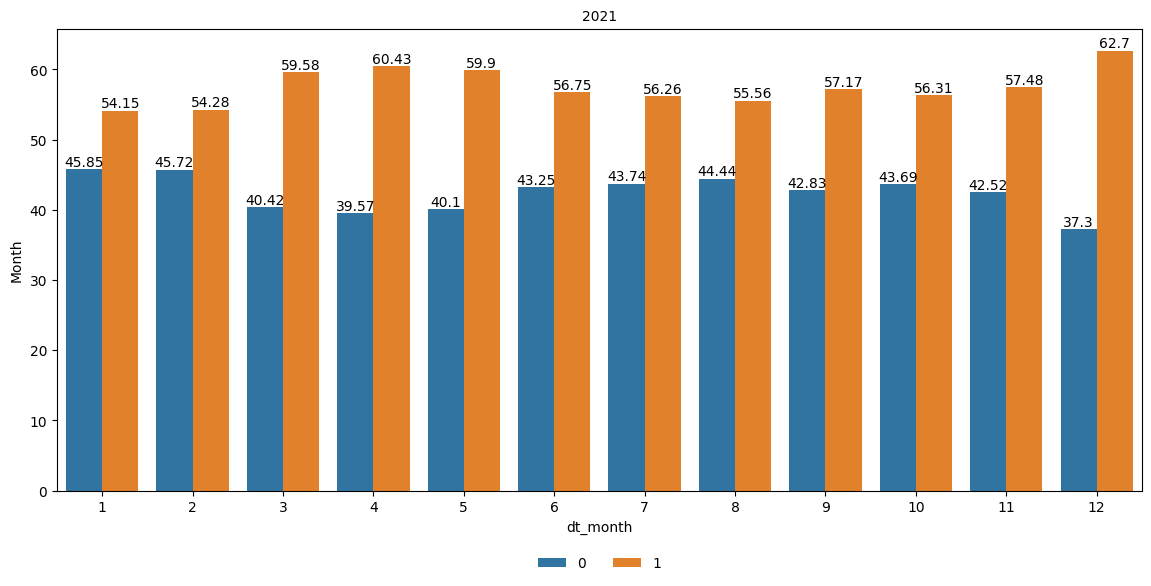

In [12]:

year = 2021
fig = plt.figure(figsize=(14,6))
tb = df[df['dt_year']==year]
ax = sns.barplot(x = 'dt_month', y = 'pct', hue='target', data = tb)
for i in ax.containers:
    ax.bar_label(i,)
    
#ax.tick_params(axis='x', labelrotation=30)
ax.set_title(f'{year}', fontsize=10)
ax.set_ylabel('Month', fontsize=10)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, -.2),
    ncol=2,
    title=None, frameon=False,
)


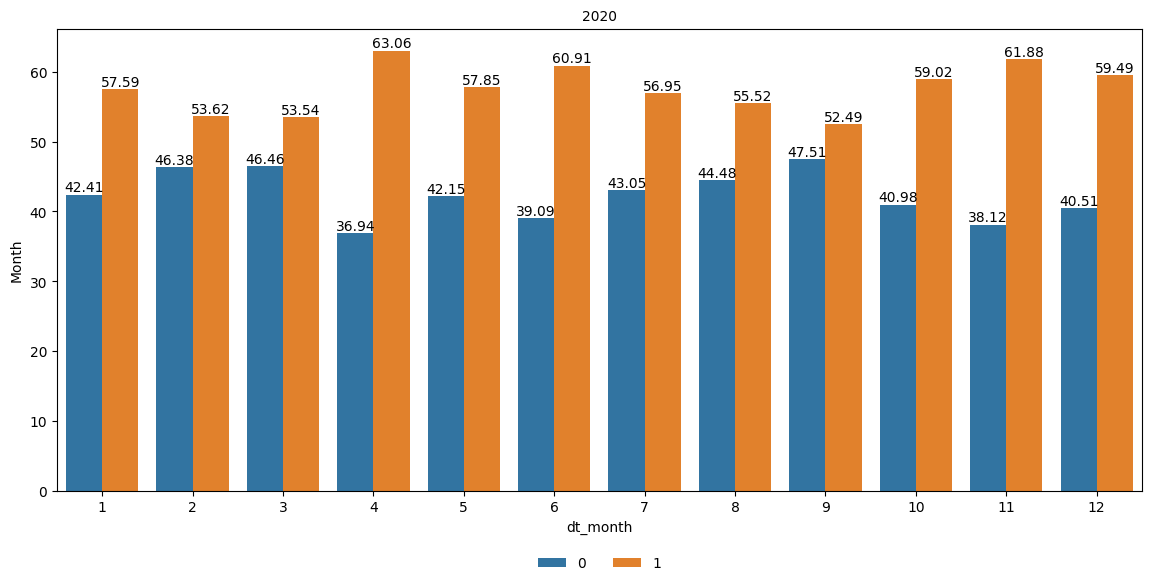

In [13]:
year = 2020
fig = plt.figure(figsize=(14,6))
tb = df[df['dt_year']==year]
ax = sns.barplot(x = 'dt_month', y = 'pct', hue='target', data = tb)
for i in ax.containers:
    ax.bar_label(i,)
    
#ax.tick_params(axis='x', labelrotation=30)
ax.set_title(f'{year}', fontsize=10)
ax.set_ylabel('Month', fontsize=10)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, -.2),
    ncol=2,
    title=None, frameon=False,
)
